# Import Libraries and Data

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

maindf = pd.read_csv('movies.csv')

In [59]:
maindf

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,near_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,"January 17, 2"
5417,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,"February 14,"
5418,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,"January 17, 2"
5419,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,"February 21,"


# Cleaning the data

In [75]:
#Dropping rows that have even one null value
maindf = maindf.dropna()

In [76]:
maindf = maindf.reset_index()

In [77]:
#Checking null values by column
for column in maindf.columns:
    missing = np.mean(maindf[column].isnull())
    print('{} - {}%'.format(column, missing))

index - 0.0%
name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [78]:
#Checking if any nulls in the whole df
maindf.isnull().values.any()

False

In [12]:
maindf.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [79]:
maindf = maindf.drop('index', axis=1)

In [80]:
#Changing data type of float fields to int since that is more appropriate for those fields

maindf['budget'] = maindf['budget'].astype('int64')
maindf['gross'] = maindf['gross'].astype('int64')
maindf['votes'] = maindf['votes'].astype('int64')
maindf['runtime'] = maindf['runtime'].astype('int64')



In [81]:
#Sort records in the df by the gross value of the movie
maindf = maindf.sort_values(by=['gross'], inplace=False, ascending=False)

In [47]:
maindf.drop_duplicates() #The number of rows here match the number of rows we have orginally in the df so there are no duplicates in our df

,index,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,near_year
0,0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,"January 17, 2"
5417,7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,"February 14,"
5418,7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,"January 17, 2"
5419,7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,"February 21,"


# Plotting the data

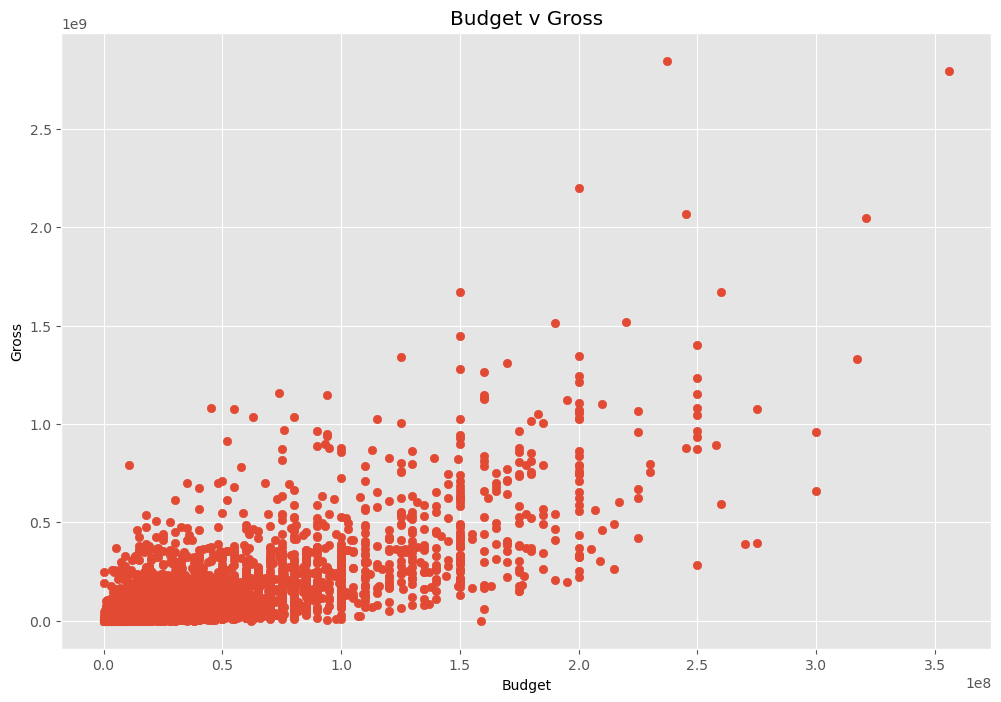

In [82]:
#Regular scatter plot of the Budget vs Gross of the movies
plt.scatter(x=maindf['budget'], y=maindf['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

[Text(0.5, 1.0, 'Gross vs Budget')]

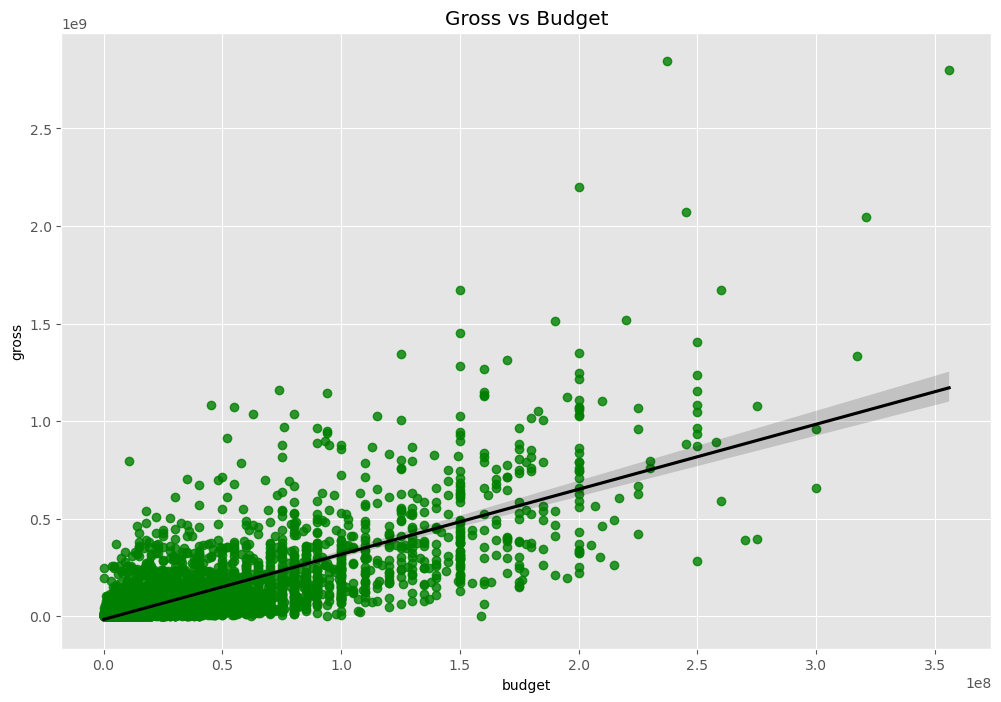

In [97]:
#Seaborn scatter plot of Budget vs Gross of the movies with customization
sns.regplot(x='budget', y='gross', data=maindf, scatter_kws={"color": "green"}, line_kws={"color": "black"}).set(title='Gross vs Budget')

# Correlation Matrices and Plots between different fields

In [84]:
#Pearson Correlation Matrix
maindf.corr()

C:\Users\Kranthi\AppData\Local\Temp\ipykernel_37600\2482479259.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  maindf.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


C:\Users\Kranthi\AppData\Local\Temp\ipykernel_37600\1149836667.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = maindf.corr()


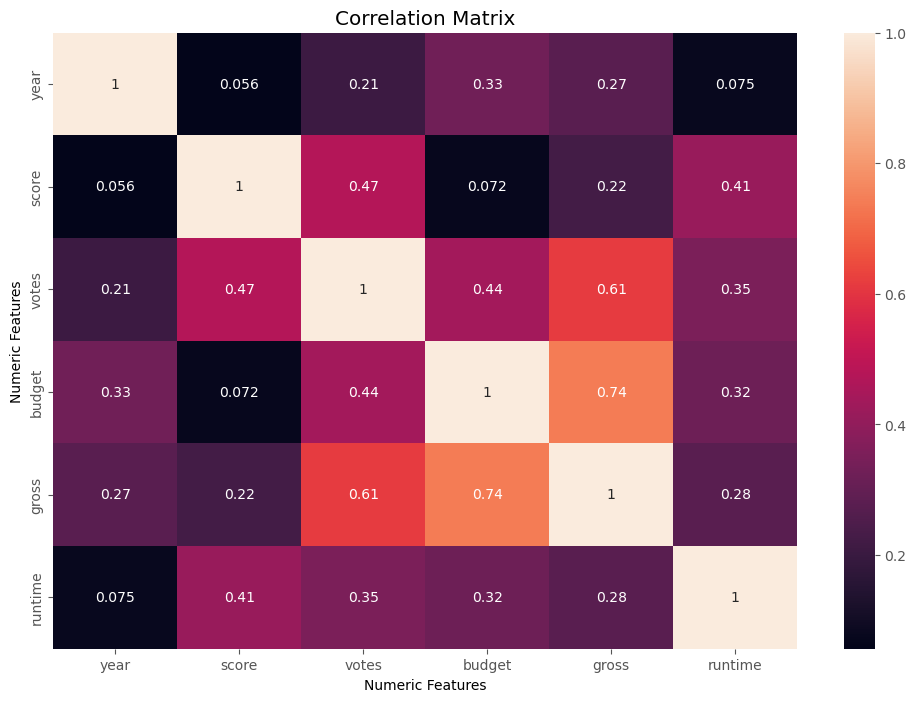

In [85]:
corr_mat = maindf.corr()
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Numeric Features')
plt.ylabel('Numeric Features')
plt.show()

In [86]:
#Encoding the non-numeric fields as numbers so that they can be used for the correlation matrix

maindf_num = maindf

for col in maindf_num.columns:
    if(maindf_num[col].dtype == 'object'):
        maindf_num[col] = maindf_num[col].astype('category')
        maindf_num[col] = maindf_num[col].cat.codes

In [87]:
maindf_num

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3731,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162
5302,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181
1795,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194
4730,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138
5158,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3898,3794,6,6,2009,890,5.8,3500,585,2924,1498,47,3000000,5073,1385,96
1378,2969,5,0,1993,1467,4.5,1900,1805,3102,186,47,5000000,2970,1376,97
2286,1595,3,6,2000,1721,6.8,43000,952,1683,527,6,5000000,2554,466,108
154,2909,6,9,1982,1525,3.9,2300,261,55,1473,47,800000,2270,582,85


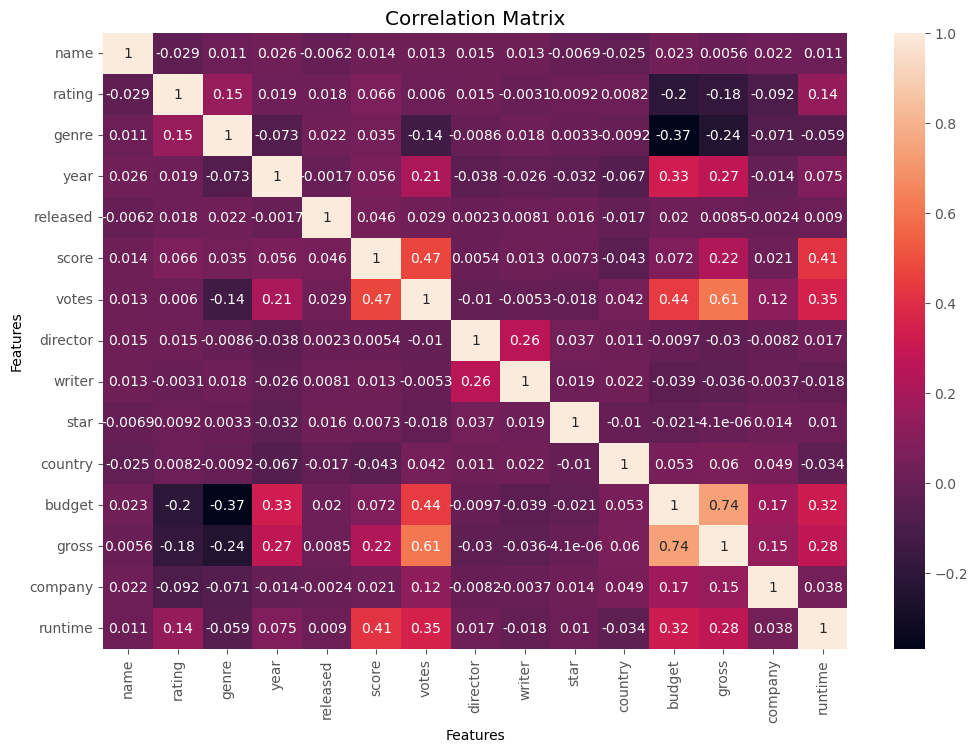

In [88]:
#Correlation matrix with the new df that has all numeric fields including the converted non-numeric fields

corr_mat1 = maindf_num.corr()
sns.heatmap(corr_mat1, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [91]:
#Unstacking the correlation matrix values for better interpretability
corr_pairs = corr_mat1.unstack()
corr_pairs

In [93]:
#Sorting the unstacked pairs of the correlation matrix
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

In [95]:
#Attaining only those correlation matrix pair values that are higher than 0.5
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

The number of votes ('votes') and the budget of the movie ('budget') seem to have a very high correlation with how much money the movie makes ('gross').
This makes sense because usually higher budget films tend to draw larger crowds and the more people watch a movie, the more votes it would have as well. 
This is reflected by the Gross - Budget and Gross - Votes correlation values.